# Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from Kaggle, and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from Kaggle
2. Setup X and y (feature matrix and target vector)
3. Split X and y into train and test subsets.
4. Preprocess your data

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix
   
5. Create your network.

   - Remember that for multi-class classification you need a softamx activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Trian your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaning the activation functions on the hidden layers, etc.
8. Load in Kaggle's `test.csv`
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for _at least_ two of the three "configurations":

1. Using a `tensorflow` network
2. Using a `keras` "sequential" network
3. Using a `keras` convolutional network
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(42000, 785)

##### 2. Setup X and Y

In [14]:
X = df.drop(columns='label').values
y = df['label']

##### 4. Process Your Data

In [15]:
X = X / 255

In [16]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
y = np_utils.to_categorical(y)

In [21]:
y[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

##### 3. Split X and Y into Train and Test stubsets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2020)

In [23]:
X_train.shape

(31500, 784)

In [24]:
X_test.shape

(10500, 784)

### 5. Create your SEQUENTIAL MODEL network

In [35]:
seq_model = Sequential([
    Dense(units=X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(units=y_train.shape[1], activation='softmax')
])

In [36]:
seq_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])


In [37]:
seq_model.fit(X_train, y_train, batch_size=100, epochs=5,
             validation_data = (X_test, y_test))


Train on 31500 samples, validate on 10500 samples
Epoch 1/5
31500/31500 [==============================] - 8s 239us/step - loss: 0.3707 - acc: 0.8923 - val_loss: 0.1853 - val_acc: 0.9465
Epoch 2/5
31500/31500 [==============================] - 7s 229us/step - loss: 0.1764 - acc: 0.9481 - val_loss: 0.1264 - val_acc: 0.9638
Epoch 3/5
31500/31500 [==============================] - 7s 236us/step - loss: 0.1273 - acc: 0.9613 - val_loss: 0.1019 - val_acc: 0.9697
Epoch 4/5
31500/31500 [==============================] - 8s 239us/step - loss: 0.1011 - acc: 0.9679 - val_loss: 0.0923 - val_acc: 0.9737
Epoch 5/5
31500/31500 [==============================] - 8s 241us/step - loss: 0.0834 - acc: 0.9744 - val_loss: 0.0922 - val_acc: 0.9713


In [38]:
seq_model.history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [39]:
sm_hist = seq_model.history
sm_hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

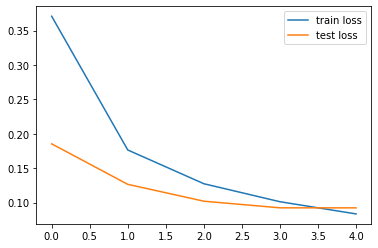

In [40]:
plt.plot(sm_hist.history['loss'], label='train loss')
plt.plot(sm_hist.history['val_loss'], label='test loss')
plt.legend();

### Convolutional Model

In [41]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [42]:
one_digit = X_train[0].reshape(28,28,1)
X_train[0].shape, one_digit.shape

((784,), (28, 28, 1))

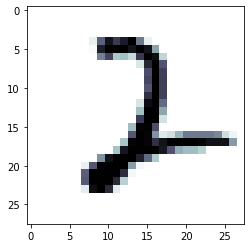

In [44]:
plt.imshow(one_digit.reshape(28,28), cmap ='bone_r');

In [46]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [53]:
cnn_model = Sequential()
# Add a pooling layer
cnn_model.add(MaxPooling2D(
    pool_size=(2,2)
))
cnn_model.add(Conv2D(
    filters=16,
    kernel_size=3,
    activation='relu'
))
cnn_model.add(MaxPooling2D(
    pool_size=(2,2)    
))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

In [55]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', netrucs=['acc'])

In [56]:
cnn_history = cnn_model.fit(
X_train, y_train,
    batch_size=256,
    validation_data=(X_test, y_test),
    epochs=5,
    verbose=1
)

Train on 31500 samples, validate on 10500 samples
Epoch 1/5
31500/31500 [==============================] - 7s 231us/step - loss: 0.7817 - val_loss: 0.3201
Epoch 2/5
31500/31500 [==============================] - 6s 193us/step - loss: 0.2579 - val_loss: 0.2158
Epoch 3/5
31500/31500 [==============================] - 6s 193us/step - loss: 0.1901 - val_loss: 0.1691
Epoch 4/5
31500/31500 [==============================] - 6s 192us/step - loss: 0.1519 - val_loss: 0.1489
Epoch 5/5
31500/31500 [==============================] - 6s 192us/step - loss: 0.1295 - val_loss: 0.1246
